<a href="https://colab.research.google.com/github/ramkumar997/Data_Science/blob/main/Pandas/Pandas-1_McKinsey_Notes_ColOps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline


- **Shallow vs Deep Copy**
    - `view()`
    - `copy()`
    - `copy.deepcopy()`

- Importing the data
    - Importing pandas
    - Importing the dataset

- **Basic ops on columns**
    - Different ways of accessing cols
    - Check for Unique values
    - Rename column
    - Deleting col


  


## Views vs Copies (Shallow vs Deep Copy)

- Numpy **manages memory very efficiently**


- Which makes it really **useful while dealing with large datasets**


#### But how does it manage memory so efficiently?

- Let's create some arrays to understand what's happening in memory while using Numpy

In [ ]:
# We'll create np array

a = np.arange(4)
a

array([0, 1, 2, 3])

In [ ]:
# Reshape array `a` and store in b

b = a.reshape(2, 2)
b

array([[0, 1],
       [2, 3]])

#### Now we will make some changes to our original array `a`

In [ ]:
a[0] = 100
a

array([100,   1,   2,   3])

#### What will be values if we print array b ?

In [ ]:
b

array([[100,   1],
       [  2,   3]])

#### Surprise Surprise!!

- Array **`b` got automatically updated**

### This is an example of Numpy using "Shallow Copy" of data

#### Now, What happens here?

- Numpy **re-uses data** as much as possible **instead of duplicating** it


- This helps Numpy to be efficient


#### When we created `b = a.reshape(2, 2)`

- Numpy **did NOT make a copy of `a` to store in `b`**, as we can clearly see


- It is **using the same data as in `a`**


- It **just looks different (reshaped)** in `b`


- That is why, **any changes in `a` automatically gets reflected in `b`**


#### How data is stored using Numpy?

- Variable **does NOT directly point to data** stored in memory


- There is something called **Header** in-between


### What does Header do?

- **Variable points to header** and **header points to data** stored in memory


- Header stores **information about data** - called **Metadata**


#### `a` is pointing to Metadata about our data `[0, 1, 2, 3]`, which may include:

- **How many values** we have --> 4


- What is the **Data Type** of data --> `int`


- What's the **Shape** --> `(4,)`

- What's the **stride** i.e. step size --> 1


#### When we do `b = a.reshape(2, 2)`

- Numpy **does NOT duplicate the data** pointed to by `a`


- It **uses the same data**


- And **create a New header for `b`** that **points to the same data** as pointed to by `a`


#### `b` points to a new Header having different values of Metadata of the same data:

- **Number of values** --> 4

- **Data Type** --> `int`

- **Shape** --> `(2, 2)`

- **Stride** i.e. step size --> 1


#### That is why:

- When data is accessed using `a`, it gives data in shape `(4,)`

- And when data is accessed using `b`, it gives same data in shape `(2, 2)`



#### This helps Numpy to save time and space - Making it efficient

### Now, Let's see an example where Numpy will create a "Deep Copy" of data

#### Now, What if we do this?

In [ ]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [ ]:
# Create `c`

c = a + 2
c

array([2, 3, 4, 5])

In [ ]:
# We make changes in a

a[0] = 100
a

array([100,   1,   2,   3])

In [ ]:
c

array([2, 3, 4, 5])

#### As we can see, `c` did not get affected on changing `a`

- Because it is an operation


- A more **permanent change in data**


- So, Numpy **had to create a separate copy for `c`** - i.e., **deep copy of array `a` for array `c`**


### Conclusion:

- Numpy is able to **use same data** for **simpler operations** like **reshape** ---> **Shallow Copy**


- It creates a **copy of data** where operations make **more permanent changes** to data ---> **Deep Copy**


#### Be careful about this while writing code using Numpy

#### Is there a way to check whether two arrays are sharing memory or not? Yes, there is

`np.shares_memory()` function to the rescue!!


In [ ]:
a= np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [ ]:
np.shares_memory(a,b)

True

Notice that Slicing creates shallow copies.

#### Why does slicing create shallow copies ?

Rememeber the stride param of the header.
- Stride is nothing but the step size.

For Array `a`, we have a stride of 1.

For creating array b,
- we are slicing array a by 2 i.e. stride 2.
- So, it creates a new header for array b with stride = 2 while pointing to the original data

In [ ]:
b[0] = 2
b

array([2, 2, 4, 6, 8])

In [ ]:
a

array([2, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Notice how change in b also changed the value in array a

Let's check with deep copy

In [ ]:
a

array([2, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
b = a +2

In [ ]:
np.shares_memory(a,b)

False

***

We learnt how **`.reshape`** and **Slicing returns a view** of the original array
- i.e. Any changes made in original array will be reflected in the new array.

However, we saw that creating new array using
- **masking** or **array operation returns deep copy** of the array.
- Any changes made in new array are not reflected in the original array.

Numpy also provides us with few functions to make shallow/ deep copy

#### How to make shallow copy?

Numpy provides us with `.view()` function which returns view of an array

#### `.view()`

Returns view of the original array

- Any changes made in new array will be reflected in original array.

Function documentation: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.view.html



In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
view_arr = arr.view()
view_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
view_arr[4] = 420
view_arr

array([  0,   1,   2,   3, 420,   5,   6,   7,   8,   9])

In [ ]:
arr

array([  0,   1,   2,   3, 420,   5,   6,   7,   8,   9])

Notice that changes in view array are reflected in original array.

#### How do we make deep copy ?

Numpy has `.copy()` function for that purpose

#### `.copy()`

Returns copy of the array.

Documentation (`.copy()`): https://numpy.org/doc/stable/reference/generated/numpy.ndarray.copy.html#numpy.ndarray.copy

Documentation: (`np.copy()`): https://numpy.org/doc/stable/reference/generated/numpy.copy.html

In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
copy_arr = arr.copy()
copy_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Let's modify the content of copy_arr and check whether it modified the original array as well

In [ ]:
copy_arr[3] = 45
copy_arr

array([ 0,  1,  2, 45,  4,  5,  6,  7,  8,  9])

In [ ]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Notice that**
- The content of original array were not modified as we changed our copy array.





there is an exception to `.copy()`:
- **`.copy()` behaves as shallow copy when using `dtype = 'object'` array**
- It will not copy object elements within arrays

#### What are object arrays ?

Object arrays are basically array of any python datatype.



Documentation: https://numpy.org/devdocs/reference/arrays.scalars.html#numpy.object_

In [ ]:
arr = np.array([1, 'm', [1,2,3]], dtype = 'object')
arr

array([1, 'm', list([1, 2, 3])], dtype=object)

#### But arrays are suppoed to be homogeous data. How is it storing data of various types?

Remember that everything is object in python.



Just like python list,
- The data actually **stored** in object arrays are **references to Python objects**, not the objects themselves.

Hence, their elements need not be of the same Python type.

**As every element in array is an object. Hence, the dtype = object.**

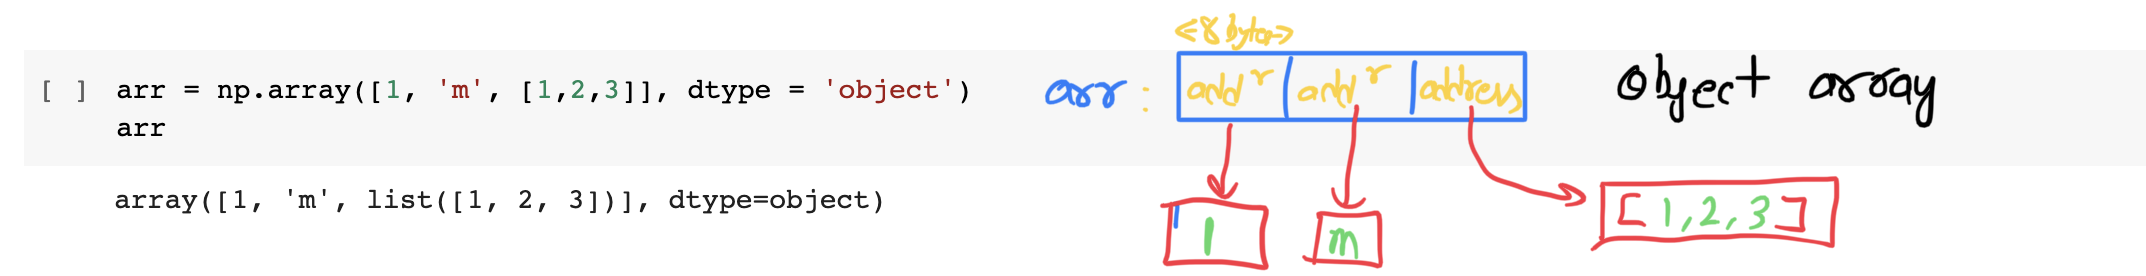

Let's make a copy of object array and check whether it returns a shallow copy or deep copy.

In [ ]:
copy_arr = arr.copy()

In [ ]:
copy_arr

array([1, 'm', list([1, 2, 3])], dtype=object)

Now, let's try to modify the list elements in copy_arr

In [ ]:
copy_arr[2][0] = 999

In [ ]:
copy_arr

array([1, 'm', list([999, 2, 3])], dtype=object)

Let's see if it changed the original array as well

In [ ]:
arr

array([1, 'm', list([999, 2, 3])], dtype=object)

It did change the original array.

Hence, **`.copy()` will return shallow copy when copying elements of array in object array.**

Any change in the 2nd level elements of array will be reflected in original array as well.

#### So, how do we create deep copy then ?

We can do so using `copy.deepcopy()` method

#### `copy.deepcopy()`

Returns the deep copy of array

Documentation: https://docs.python.org/3/library/copy.html#copy.deepcopy

In [ ]:
import copy

In [ ]:
arr = np.array([1, 'm', [1,2,3]], dtype = 'object')
arr

array([1, 'm', list([1, 2, 3])], dtype=object)

Let's make a copy using `deepcopy()`

In [ ]:
copy = copy.deepcopy(arr)

In [ ]:
copy

array([1, 'm', list([1, 2, 3])], dtype=object)

Let's modify the array inside copy array

In [ ]:
copy[2][0] = 999

In [ ]:
copy

array([1, 'm', list([999, 2, 3])], dtype=object)

In [ ]:
arr

array([1, 'm', list([1, 2, 3])], dtype=object)

Notice that,

- the changes in copy array didn't reflect back to original array.

`copy.deepcopy()` **returns deep copy of an array.**

#### Summarizing
- `.view()` returns shallow copy of array
- `.copy()` returns deep copy of an array except for object type array
- `copy.deepcopy()` returns deep copy of an array.


## Installing Pandas

In [ ]:
# !pip install pandas

## Importing Pandas

- You should be able to import Pandas after installing it


- We'll import `pandas` as its **alias name `pd`**

In [ ]:
import pandas as pd
import numpy as np

## Introduction: Why to use Pandas?


#### How is it different from numpy ?

  - The major **limitation of numpy** is that it can only work with 1 datatype at a time

  - Most real-world datasets contain a mixture of different datatypes
    - Like **names of places would be string** but their **population would be int**
  
==> It is **difficult to work** with data having **heterogeneous values using Numpy**

#### Pandas can work with numbers and strings together

<!-- - If our **data has only numbers**, we are better off using **Numpy**
  - It's **lighter** and **easier**

- But if our data has both **number and non-number vals**, it makes sense to use **Pandas** -->

So lets see how we can use pandas



## Imagine that you are a Data Scientist with McKinsey



  - McKinsey wants to understand the relation between **GDP per capita** and **life expectancy** and various trends for their clients.
  - The company has acquired **data from multiple surveys** in different countries in the past
  - This contains info of several years about:
   - country
   - population size
   - life expectancy
   - GDP per Capita
  - We have to analyse the data and draw **inferences** meaningful to the company

## Reading dataset in Pandas

Link:https://drive.google.com/file/d/1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_/view?usp=sharing

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_" -O mckinsey.csv

--2023-01-22 03:54:45--  https://drive.google.com/uc?export=download&id=1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_
Resolving drive.google.com (drive.google.com)... 108.177.11.102, 108.177.11.139, 108.177.11.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.11.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g38s23fecv0mcd758kb1056i2v0htii5/1674359625000/14302370361230157278/*/1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_?e=download&uuid=5aa08525-96ce-4b50-9402-b7ab4635590d [following]
--2023-01-22 03:54:46--  https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g38s23fecv0mcd758kb1056i2v0htii5/1674359625000/14302370361230157278/*/1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_?e=download&uuid=5aa08525-96ce-4b50-9402-b7ab4635590d
Resolving doc-0s-68-docs.googleusercontent.com (doc-0s-68-docs.googleusercontent.com)... 173.194.218.132, 2607

In [ ]:
df = pd.read_csv('mckinsey.csv') # We are storing the data in df
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


## Basic operations on columns


Now what operations can we do using columns?
- Maybe add a column
- or delete a column
- or we can rename the column too

and so on.


We can see that our dataset has 6 cols

#### But what if our dataset has 20 cols ? ... or 100 cols ? We can't see ther names in **one go**.

#### How can we get the names of all these cols ?

We can do it in two ways:
  1. df.columns
  2. df.keys



In [ ]:
df.columns  # using attribute `columns` of dataframe

Index(['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap'], dtype='object')

In [ ]:
df.keys()  # using method keys() of dataframe

Index(['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap'], dtype='object')

Note:

- Here, `Index` is a type of pandas class used to store the `address` of the series/dataframe

- It is an Immutable sequence used for indexing and alignment.





In [ ]:
# df['country'].head()  # Gives values in Top 5 rows pertaining to the key

Pandas DataFrame and Series are specialised dictionary

#### But what is so "special" about this dictionary?

It can take multiple keys


In [ ]:
df[['country', 'life_exp']].head()

,country,life_exp
0,Afghanistan,28.801
1,Afghanistan,30.332
2,Afghanistan,31.997
3,Afghanistan,34.020
4,Afghanistan,36.088


And what if we pass a single column name?

In [ ]:
df[['country']].head()

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan


Note:

Notice how this output type is different from our earlier output using `df['country']`

==> `['country']` gives series while `[['country']]` gives dataframe

Now that we know how to access columns, lets answer some questions

### How can we find the countries that have been surveyed ?

We can find the unique vals in the `country` col

#### How can we find unique values in a column?

In [ ]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

#### Now what if you also want to check the count of each country in the dataframe?


In [ ]:
df['country'].value_counts()

Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: country, Length: 142, dtype: int64

Note:

`value_counts()` shows the output in **decreasing order of frequency**

### What if we want to change the name of a column ?

We can rename the column by:
- passing the dictionary with `old_name:new_name` pair
- specifying `axis=1`

In [ ]:
df.rename({"population": "Population", "country":"Country" }, axis = 1)

,Country,year,Population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


Alternatively, we can also rename the column without using `axis`
- by using the `column` parameter



In [ ]:
df.rename(columns={"country":"Country"})

,Country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


We can set it inplace by setting the `inplace` argument = True

In [ ]:
df.rename({"country": "Country"}, axis = 1, inplace = True)
df

,Country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


**Note**
- .rename has default value of axis=0
- If two columns have the **same name**, then `df['column']` will display both columns

Now lets try another way of accessing column vals

In [ ]:
df.Country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: Country, Length: 1704, dtype: object

This however doesn't work everytime

#### What do you think could be the problems with using attribute style for accessing the columns?

**Problems** such as
- if the column names are **not strings**
  - Starting with **number**: E.g., ```2nd```
  - Contains a **space**: E.g., ```Roll Number```
- or if the column names conflict with **methods of the DataFrame**
  - E.g. ```shape```

It is generally better to avoid this type of accessing columns

#### Are all the columns in our data necessary?
  
  - We already know the continents in which each country lies
  - So we don't need this column


### How can we delete cols in pandas dataframe ?


In [ ]:
df.drop('continent', axis=1)

,Country,year,population,life_exp,gdp_cap
0,Afghanistan,1952,8425333,28.801,779.445314
1,Afghanistan,1957,9240934,30.332,820.853030
2,Afghanistan,1962,10267083,31.997,853.100710
3,Afghanistan,1967,11537966,34.020,836.197138
4,Afghanistan,1972,13079460,36.088,739.981106
...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,62.351,706.157306
1700,Zimbabwe,1992,10704340,60.377,693.420786
1701,Zimbabwe,1997,11404948,46.809,792.449960
1702,Zimbabwe,2002,11926563,39.989,672.038623


The `drop` function takes two parameters:
  - The column name
  - The axis
  
By default the value of `axis` is 0



An alternative to the above approach is using the "columns" parameter as we did in rename

In [ ]:
df.drop(columns=['continent'])

,Country,year,population,life_exp,gdp_cap
0,Afghanistan,1952,8425333,28.801,779.445314
1,Afghanistan,1957,9240934,30.332,820.853030
2,Afghanistan,1962,10267083,31.997,853.100710
3,Afghanistan,1967,11537966,34.020,836.197138
4,Afghanistan,1972,13079460,36.088,739.981106
...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,62.351,706.157306
1700,Zimbabwe,1992,10704340,60.377,693.420786
1701,Zimbabwe,1997,11404948,46.809,792.449960
1702,Zimbabwe,2002,11926563,39.989,672.038623


As you can see, **column `contintent` is dropped**

#### Has the column permanently been deleted?

In [ ]:
df.head()

,Country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


NO, the **column `continent` is still there**

**Do you see what's happening here?**

We only got a **view of dataframe with column `continent` dropped**

#### How can we permanently drop the column?

We can either **re-assign** it
- `df = df.drop('continent', axis=1)`

  OR
    
- We can **set parameter `inplace=True`**
    
By **default, `inplace=False`**

In [ ]:
df.drop('continent', axis=1, inplace=True)

In [ ]:
df.head() #we print the head to check

,Country,year,population,life_exp,gdp_cap
0,Afghanistan,1952,8425333,28.801,779.445314
1,Afghanistan,1957,9240934,30.332,820.853030
2,Afghanistan,1962,10267083,31.997,853.100710
3,Afghanistan,1967,11537966,34.020,836.197138
4,Afghanistan,1972,13079460,36.088,739.981106


Now we can see the column `continent` is permanently dropped

### Now similarly, what if we want to create a new column?

We can either
- use values from **existing columns**

OR
- create our **own values**

#### How to create a column using values from an existing column?

In [ ]:
df["year+7"] = df["year"] + 7
df.head()

,Country,year,population,life_exp,gdp_cap,year+7
0,Afghanistan,1952,8425333,28.801,779.445314,1959
1,Afghanistan,1957,9240934,30.332,820.853030,1964
2,Afghanistan,1962,10267083,31.997,853.100710,1969
3,Afghanistan,1967,11537966,34.020,836.197138,1974
4,Afghanistan,1972,13079460,36.088,739.981106,1979


As we see, a new column `year+7` is created from the column `year`

We can also use values from two columns to form a new column

#### Which two columns can we use to create a new column `gdp`?

In [ ]:
df['gdp']=df['gdp_cap'] * df['population']
df.head()

,Country,year,population,life_exp,gdp_cap,year+7,gdp
0,Afghanistan,1952,8425333,28.801,779.445314,1959,6.567086e+09
1,Afghanistan,1957,9240934,30.332,820.853030,1964,7.585449e+09
2,Afghanistan,1962,10267083,31.997,853.100710,1969,8.758856e+09
3,Afghanistan,1967,11537966,34.020,836.197138,1974,9.648014e+09
4,Afghanistan,1972,13079460,36.088,739.981106,1979,9.678553e+09


#### As you can see

- An **additional column** has been **created**

- **Values** in this column are **product of respective values in `gdp_cap` and `population`**


#### What other operations we can use?

Subtraction, Addition, etc.

### How can we create a new column from our own values?

- We can **create a list**

OR

- We can **create a Pandas Series** from a list/numpy array for our new column

In [ ]:
df["Own"] = [i for i in range(1704)]  # count of these values should be correct
df

,Country,year,population,life_exp,gdp_cap,year+7,gdp,Own
0,Afghanistan,1952,8425333,28.801,779.445314,1959,6.567086e+09,0
1,Afghanistan,1957,9240934,30.332,820.853030,1964,7.585449e+09,1
2,Afghanistan,1962,10267083,31.997,853.100710,1969,8.758856e+09,2
3,Afghanistan,1967,11537966,34.020,836.197138,1974,9.648014e+09,3
4,Afghanistan,1972,13079460,36.088,739.981106,1979,9.678553e+09,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,62.351,706.157306,1994,6.508241e+09,1699
1700,Zimbabwe,1992,10704340,60.377,693.420786,1999,7.422612e+09,1700
1701,Zimbabwe,1997,11404948,46.809,792.449960,2004,9.037851e+09,1701
1702,Zimbabwe,2002,11926563,39.989,672.038623,2009,8.015111e+09,1702


Now that we know how to create new cols lets see some basic ops on rows

Before that lets drop the newly created cols


In [ ]:
df.drop(columns=["Own",'gdp', 'year+7'], axis = 1, inplace = True)
df

,Country,year,population,life_exp,gdp_cap
0,Afghanistan,1952,8425333,28.801,779.445314
1,Afghanistan,1957,9240934,30.332,820.853030
2,Afghanistan,1962,10267083,31.997,853.100710
3,Afghanistan,1967,11537966,34.020,836.197138
4,Afghanistan,1972,13079460,36.088,739.981106
...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,62.351,706.157306
1700,Zimbabwe,1992,10704340,60.377,693.420786
1701,Zimbabwe,1997,11404948,46.809,792.449960
1702,Zimbabwe,2002,11926563,39.989,672.038623
